In [0]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.datasets import imdb
import keras as K
import numpy as np

In [0]:
max_words = 20000

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_words)

max_review_length = 80
train_x = K.preprocessing.sequence.pad_sequences(train_x, truncating='pre', padding='pre', maxlen=max_review_length)
test_x = K.preprocessing.sequence.pad_sequences(test_x, truncating='pre', padding='pre', maxlen=max_review_length)

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
model = Sequential()
embedding_length = 5
max_words = 1000
max_sentence_length = 10
model.add(Embedding(max_words, embedding_length, input_length=max_sentence_length))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than max_words-1 (vocabulary size).
# now model.output_shape == (None, max_review_length, embedding_length), where None is the batch dimension.


input_array = input_array = np.random.randint(max_words, size=(2, max_sentence_length)) #train_x[0]
print(input_array, np.shape(input_array))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array, np.shape(output_array))

[[496 304 735 536 257 471 499 452 509 143]
 [430 577 100 776 236 489 362 270 501 439]] (2, 10)
[[[-0.04356572 -0.02824876  0.03866962  0.04219128 -0.03202637]
  [-0.04589695 -0.01810889  0.04222479  0.01211461  0.03330297]
  [ 0.01695061 -0.00493645  0.0361867  -0.00280672 -0.01270933]
  [ 0.03185328 -0.03797454 -0.00048887 -0.02884183 -0.0480752 ]
  [-0.01533478  0.01668726  0.00622022 -0.04528145  0.0045926 ]
  [-0.01999518 -0.00843755 -0.02578173 -0.00021812 -0.04908135]
  [ 0.04142855 -0.02666166  0.02583506 -0.01988607  0.03066779]
  [-0.00958717  0.02961511 -0.04021627 -0.03921432  0.03144628]
  [-0.04587152  0.04167854 -0.03687809  0.00402248  0.03278175]
  [ 0.04034099 -0.02773658  0.00932688  0.03555271  0.01098888]]

 [[-0.04894861  0.03027191  0.01834135 -0.00676463 -0.00940288]
  [ 0.02977796  0.00265422  0.03600073  0.0260287   0.00629942]
  [-0.02169105  0.03370566  0.02442472 -0.03113916  0.03650936]
  [ 0.02264759  0.01839076 -0.01925394 -0.04176837  0.00086667]
  [-0.0

# One hot representation

In [1]:
from keras.preprocessing.text import one_hot

#define documents
docs = ['glass of orange juice',
        'bottle of mango juice',
        'glass of mango shake',
        'drink bottle of banana shake',
        'I want a glass of cold water',
        'The king and the queen',
        'man and woman']

vocab_size = 10000

encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

Using TensorFlow backend.


[[8637, 5024, 2523, 882], [6178, 5024, 1415, 882], [8637, 5024, 1415, 4717], [3223, 6178, 5024, 3367, 4717], [3604, 4779, 5517, 8637, 5024, 7488, 8431], [6544, 7605, 8978, 6544, 6292], [6531, 8978, 8366]]


# Word Embeddings

In [4]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM

import numpy as np

embedding_length = 5
max_doc_len = 10

encoded_docs = pad_sequences(encoded_docs, truncating='post', padding='post', maxlen=max_doc_len)

print(encoded_docs)


[[8637 5024 2523  882    0    0    0    0    0    0]
 [6178 5024 1415  882    0    0    0    0    0    0]
 [8637 5024 1415 4717    0    0    0    0    0    0]
 [3223 6178 5024 3367 4717    0    0    0    0    0]
 [3604 4779 5517 8637 5024 7488 8431    0    0    0]
 [6544 7605 8978 6544 6292    0    0    0    0    0]
 [6531 8978 8366    0    0    0    0    0    0    0]]


In [5]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_length, input_length=max_doc_len))
model.add(LSTM(units=64))

model.compile('rmsprop', 'mse')

model.summary()

output = model.predict(encoded_docs)
print(output.shape)
print(output)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 5)             50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                17920     
Total params: 67,920
Trainable params: 67,920
Non-trainable params: 0
_________________________________________________________________
(7, 64)
[[ 1.04733568e-03  5.76076843e-03 -3.08642094e-03  5.59022956e-05
   3.54336784e-03  4.84221568e-03 -5.02577983e-03 -4.86248033e-03
   4.98130126e-03  1.93051365e-03  5.80177410e-03 -2.94320378e-03
   1.02652004e-03 -3.34111438e-03  2.16091122e-03  2.14286172e-03
   7.17660805e-05 -1.04478898e-03  1.12592604e-03 -1.60318194e-03
   3.02541914e-04 -7.94390799e-04 -3.18971055e-04  3.61634279e-03
  -2.35588686e-03 -5.14878193e-04 -7.87768688e-04 -6.16666046e-04
   1.63277762e-03 -1.90349703e-03  2.04606

##Putting it together
#Sentiment Analysis in Keras

Import libraries and dataset

In [1]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_words = 20000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences


Pre-processing

In [2]:
# cut texts after this number of words (among top max_features most common words)
max_review_length = 80

x_train = sequence.pad_sequences(x_train, truncating='pre', padding='pre', maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, truncating='pre', padding='pre', maxlen=max_review_length)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


Build the model

In [3]:
print('Build model...')
embedding_length = 64
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_length, input_length=max_review_length))
model.add(LSTM(units=64, input_shape=(max_review_length, embedding_length), return_sequences=False, unroll=True))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Build model...





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Visualize the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


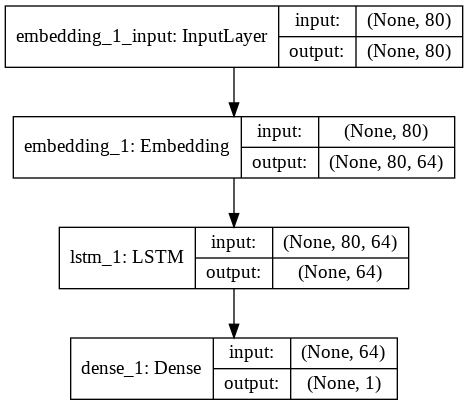

In [4]:
#Visualize
model.summary()

from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='sent_analysis_model.png')

Train the model

In [5]:
print('Training...')
batch_size = 32

model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs=10,
          validation_data = (x_test, y_test))

Training...



Train on 25000 samples, validate on 25000 samples
Epoch 1/10





25000/25000 [==============================] - 91s 4ms/step - loss: 0.4327 - acc: 0.7929 - val_loss: 0.3926 - val_acc: 0.8248
Epoch 2/10
25000/25000 [==============================] - 66s 3ms/step - loss: 0.2587 - acc: 0.8988 - val_loss: 0.3827 - val_acc: 0.8286
Epoch 3/10
25000/25000 [==============================] - 65s 3ms/step - loss: 0.1641 - acc: 0.9387 - val_loss: 0.4335 - val_acc: 0.8282
Epoch 4/10
25000/25000 [==============================] - 65s 3ms/step - loss: 0.1062 - acc: 0.9627 - val_loss: 0.5269 - val_acc: 0.8214
Epoch 5/10
25000/25000 [==============================] - 65s 3ms/step - loss: 0.0713 - acc: 0.9748 - val_loss: 0.6100 - val_acc: 0.8211
Epoch 6/10
25000/25000 [==============================] - 66s 3ms/step - loss: 0.0487 - acc: 0.9844 - val_loss: 0.7580 - val_acc: 0.8169
Epoch 7/10
25000/25000 [==============================] - 66s 3ms/step - loss: 0.0422 - acc: 0.9864 - val_lo

Evaluate the model

In [6]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score = {score}')
print(f'Test accuracy = {acc}')

25000/25000 [==============================] - 15s 612us/step
Test score = 0.8885007614523173
Test accuracy = 0.81616


Making predictions with model

In [14]:
#review = "The movie was a great waste of time."
review = "It was a great movie."
print(f'New review = {review}')

d = imdb.get_word_index()
words = review.split()
review = []

for word in words:
  if word not in d:
    review.append(2)
  else:
    review.append(d[word] + 3)
  
print(f"review = {review}")

review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=80)

prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

New review = It was a great movie.
review = [2, 16, 6, 87, 2]
Prediction (0 = Negative, 1 = positive) = [[0.67252386]]
